In [3]:
import os
import sys
sys.path.append(os.path.abspath('../utils'))
from transformer_pipeline import get_features_transformer, drop_rows


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import  seaborn as sns
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PowerTransformer, RobustScaler

In [6]:
df = pd.read_csv("../data/movie_statistic_dataset.csv")

df = drop_rows(df)
transformer = get_features_transformer(PowerTransformer(method='box-cox'), 
                                       PowerTransformer(method='box-cox'), 
                                       RobustScaler(), 
                                       StandardScaler())
X = transformer.fit_transform(df)

# PCA

In [3]:
from sklearn.decomposition import PCA

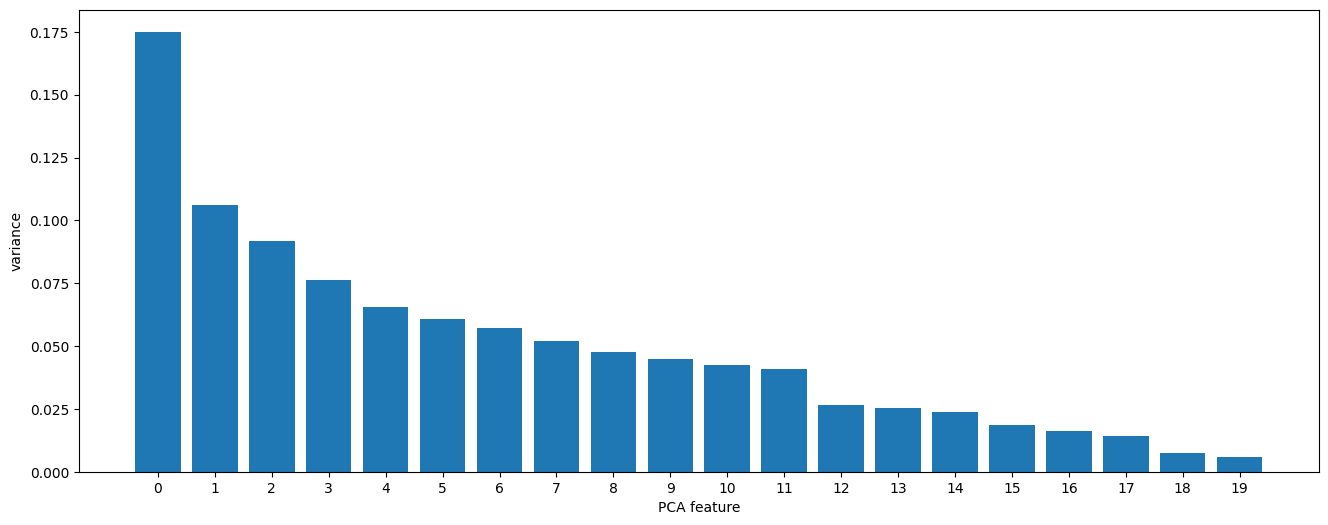

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pca = PCA(svd_solver="full")
scaler = StandardScaler()

pipe = make_pipeline(scaler,pca)

pipe.fit(X)
features = range(pca.n_components_)
plt.figure(figsize=(16, 6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [5]:
sum = 0
i = 1
while sum < 0.9:
    sum = np.sum(pca.explained_variance_ratio_[0:i])
    i += 1
print("Sum:", sum, "number of PCA features:", i)

Sum: 0.9135925094338578 number of PCA features: 15


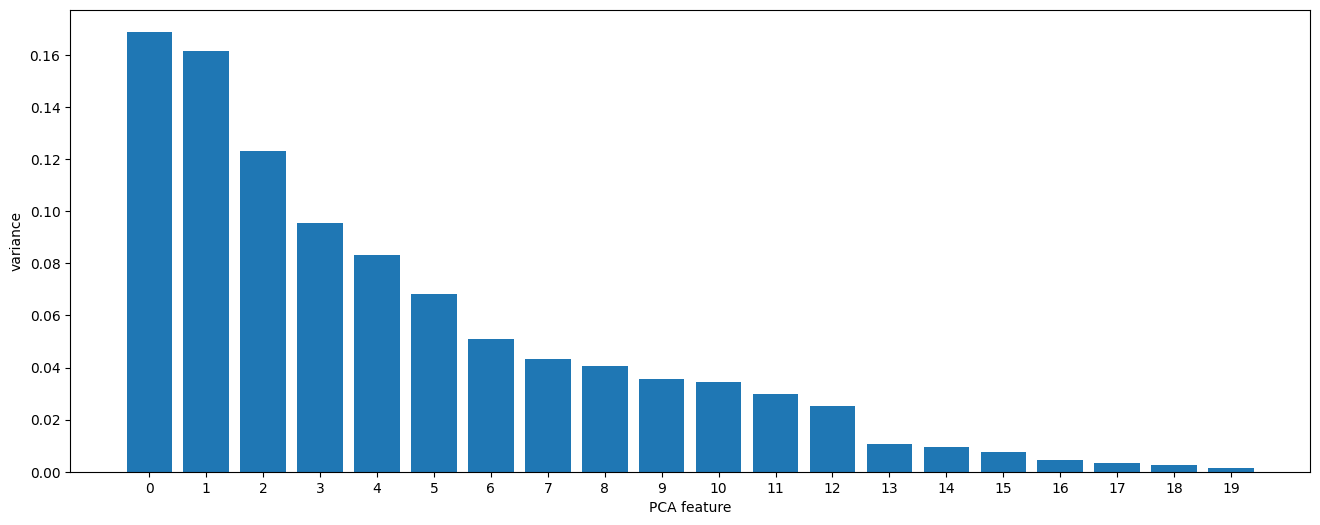

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline


pca = PCA(svd_solver="full")
scaler = MinMaxScaler()

pipe = make_pipeline(scaler,pca)

pipe.fit(X)
features = range(pca.n_components_)
plt.figure(figsize=(16, 6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [7]:
sum = 0
i = 1
while sum < 0.9:
    sum = np.sum(pca.explained_variance_ratio_[0:i])
    i += 1

In [8]:
print("Sum:", sum, "number of PCA features:", i)

Sum: 0.9053475594198653 number of PCA features: 12


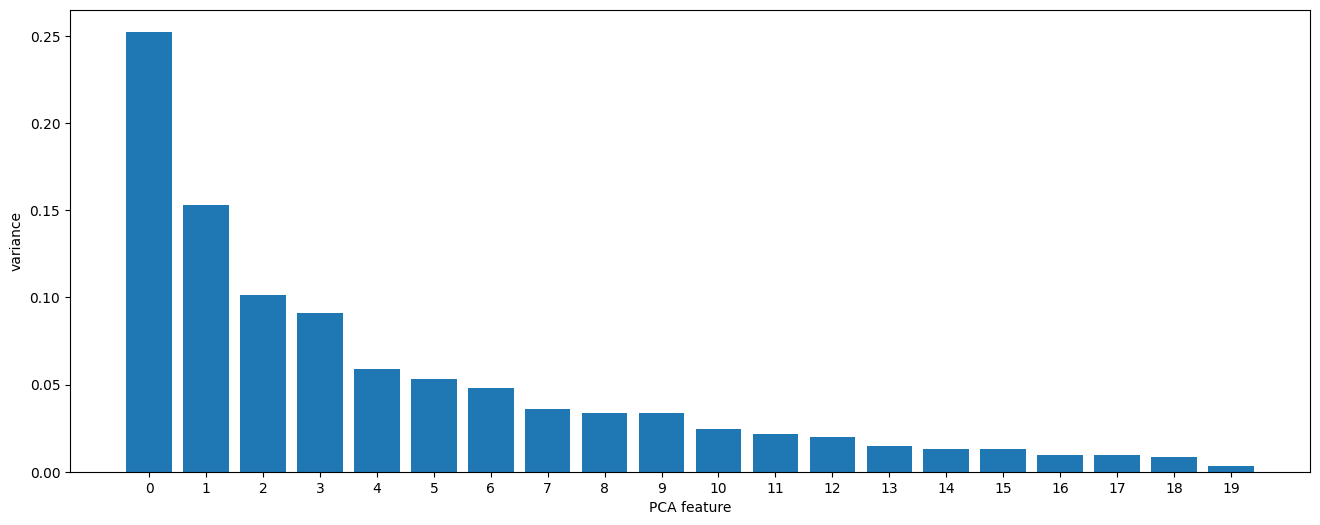

In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline


pca = PCA(svd_solver="full")
scaler = RobustScaler()

pipe = make_pipeline(scaler,pca)

pipe.fit(X)
features = range(pca.n_components_)
plt.figure(figsize=(16, 6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [10]:
X_transformed = pca.transform(X)
X_transformed.shape


(3490, 20)

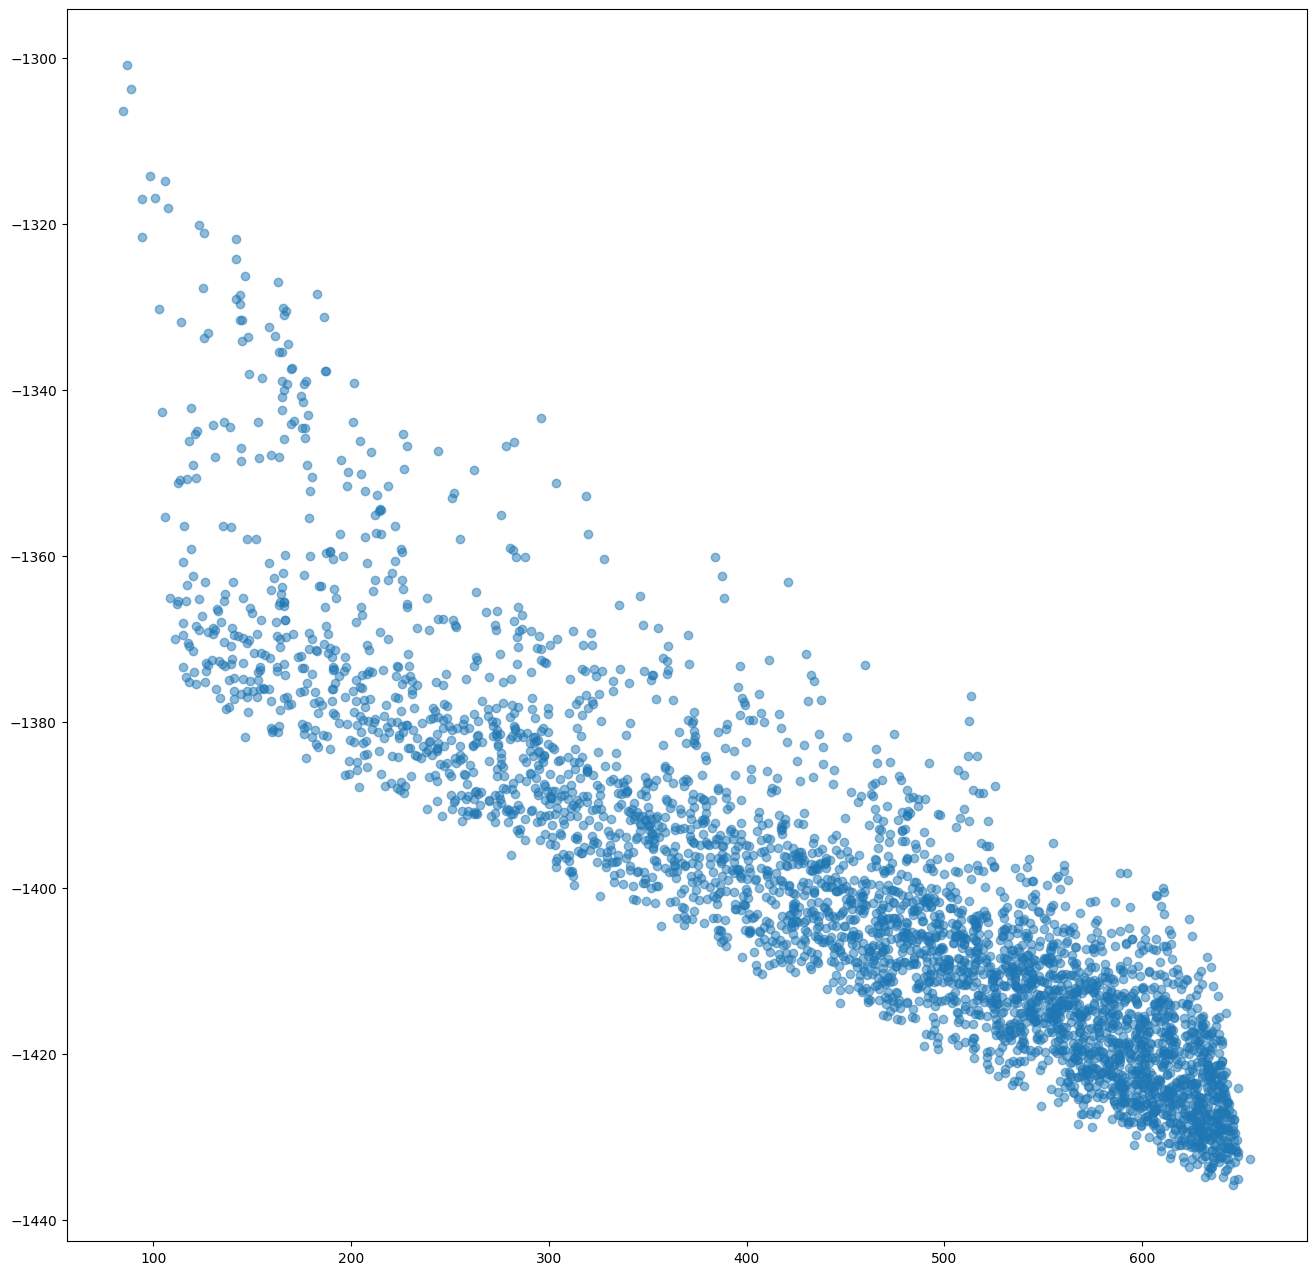

In [11]:
plt.figure(figsize=(16, 16))
plt.scatter(X_transformed[:,0],X_transformed[:,1], alpha= 0.5)
plt.show()

# NMF

### TODO

In [12]:
from sklearn.decomposition import NMF

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline


nmf = NMF(n_components=2, init='random', random_state=0)
scaler = MinMaxScaler()

pipe = make_pipeline(scaler,nmf)

X_transformed = pipe.fit_transform(X)


/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [14]:
X_transformed.shape

(3490, 2)

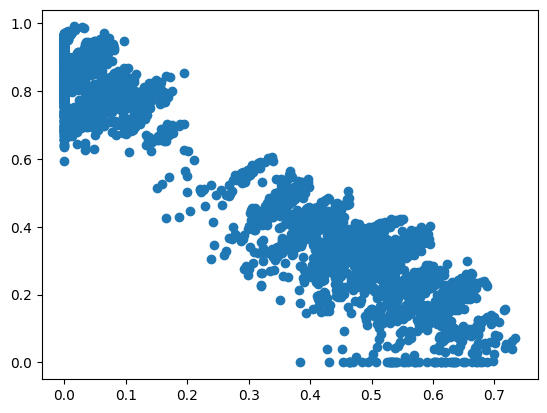

In [15]:
plt.scatter(X_transformed[:,0], X_transformed[:,1])